In [1]:
import os
import datetime
import requests

import brownie

from utils.network_utils import connect_eth_alchemy
from utils.contract_utils import init_contract

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

In [3]:
connect_eth_alchemy()

In [4]:
vlcvx_addr = "0xD18140b4B819b895A3dba5442F959fA44994AF50"

In [5]:
current_block = brownie.web3.eth.block_number

In [6]:
query = f"https://api.etherscan.io/api?module=account&action=txlist&address={vlcvx_addr}&startblock=0&endblock=9999999999&sort=asc&page=1&offset=10000&apikey={os.environ['ETHERSCAN_API_KEY']}"
response = requests.post(query)

In [7]:
interacting_addrs = []
for tx in dict(response.json())['result']:
    interacting_addrs.append(tx['from'])
len(interacting_addrs)

6821

In [8]:
vlcvx = init_contract(vlcvx_addr)

In [17]:
vlcvx.lockedBalanceOf("0x7038C406e7e2C9F81571557190d26704bB39B8f3") * 1e-18

1073446.351179645

In [9]:
vlcvx_balances = []
with brownie.multicall():
    for addr in interacting_addrs:
        vlcvx_balances.append(vlcvx.lockedBalanceOf(addr))

In [10]:
df_vlcvx_balances = pd.DataFrame({"addr": interacting_addrs, "vlcvx_balance": vlcvx_balances})
df_vlcvx_balances

,addr,vlcvx_balance
0,0x947b7742c403f20e5faccdac5e092c943e7d0277,0
1,0x947b7742c403f20e5faccdac5e092c943e7d0277,0
2,0x947b7742c403f20e5faccdac5e092c943e7d0277,0
3,0x947b7742c403f20e5faccdac5e092c943e7d0277,0
4,0x947b7742c403f20e5faccdac5e092c943e7d0277,0
...,...,...
6816,0xbbd0e6a976af7c21b7072da96072d289b49059b9,1486065971326090595663
6817,0x81827e9ee5d74d6436455bfba294361378fda274,1152972620622631540066
6818,0x08f47ffbb40aae4662eb5f4f284f2d056deb0dc2,6793140634987782043233
6819,0xef5695ef7b34e45f7e16282c2d86365128e4f021,1000086785420919979291


In [11]:
df_vlcvx_balances = df_vlcvx_balances.where(df_vlcvx_balances.vlcvx_balance > 0)
df_vlcvx_balances['vlcvx_balance'] *= 1e-18
df_vlcvx_balances.drop_duplicates(inplace=True)
df_vlcvx_balances

,addr,vlcvx_balance
0,NaN,NaN
5,0xaac0aa431c237c2c0b5f041c8e59b3f1a43ac78f,2256881.270167
6,0x94dfce828c3daaf6492f1b6f66f9a1825254d24b,947261.932749
7,0xc7c022bd85529bed1b92de4ba847f3f4e8fd5cbf,555126.480567
8,0x2ba8c59c99c94ac5d3b2af7019d2861c640e91f7,6628.986391
...,...,...
6812,0x8f95b408adbbae47a7ba04fb2ef939867e8d20f0,3116.171155
6813,0x8e3698307355b4fdf598912f554bfc258abfdba8,1498.202788
6814,0xc52f219abcd8f3f7fe742b60578570770432bd4f,302.175255
6816,0xbbd0e6a976af7c21b7072da96072d289b49059b9,1486.065971


In [12]:
export_df = df_vlcvx_balances.dropna().sort_values(by=['vlcvx_balance'], ascending=False).reset_index().drop(columns=['index'])
export_df

,addr,vlcvx_balance
0,0xaac0aa431c237c2c0b5f041c8e59b3f1a43ac78f,2256881.270167
1,0x9c5083dd4838e120dbeac44c052179692aa5dac5,1000000.002648
2,0xa22eb3338dfd69458513a1f6d4742ab29f7ef333,1000000.0
3,0x94dfce828c3daaf6492f1b6f66f9a1825254d24b,947261.932749
4,0xb3df5271b92e9fd2fed137253bb4611285923f16,943478.452843
...,...,...
2923,0xeac03ab059b522886a6f273bd96b26bd86a0b4a2,1.0
2924,0x789c455e63c476612bc8cd88c92f050e7446d14f,1.0
2925,0x9ead5e6e90440e69b5f28fef5942a5b273387c13,1.0
2926,0xff77fdef2685402f9064cd14ae24aa4609d8d867,1.0


In [13]:
export_df['vlcvx_ownership'] = export_df.vlcvx_balance / export_df.vlcvx_balance.sum()
export_df

,addr,vlcvx_balance,vlcvx_ownership
0,0xaac0aa431c237c2c0b5f041c8e59b3f1a43ac78f,2256881.270167,0.096939
1,0x9c5083dd4838e120dbeac44c052179692aa5dac5,1000000.002648,0.042952
2,0xa22eb3338dfd69458513a1f6d4742ab29f7ef333,1000000.0,0.042952
3,0x94dfce828c3daaf6492f1b6f66f9a1825254d24b,947261.932749,0.040687
4,0xb3df5271b92e9fd2fed137253bb4611285923f16,943478.452843,0.040525
...,...,...,...
2923,0xeac03ab059b522886a6f273bd96b26bd86a0b4a2,1.0,0.0
2924,0x789c455e63c476612bc8cd88c92f050e7446d14f,1.0,0.0
2925,0x9ead5e6e90440e69b5f28fef5942a5b273387c13,1.0,0.0
2926,0xff77fdef2685402f9064cd14ae24aa4609d8d867,1.0,0.0


In [14]:
now = datetime.datetime.utcnow()
now = datetime.datetime.strftime(now, "%Y-%m-%d--%H-%M")
export_df.to_csv(f'lockooooors_{now}.csv')

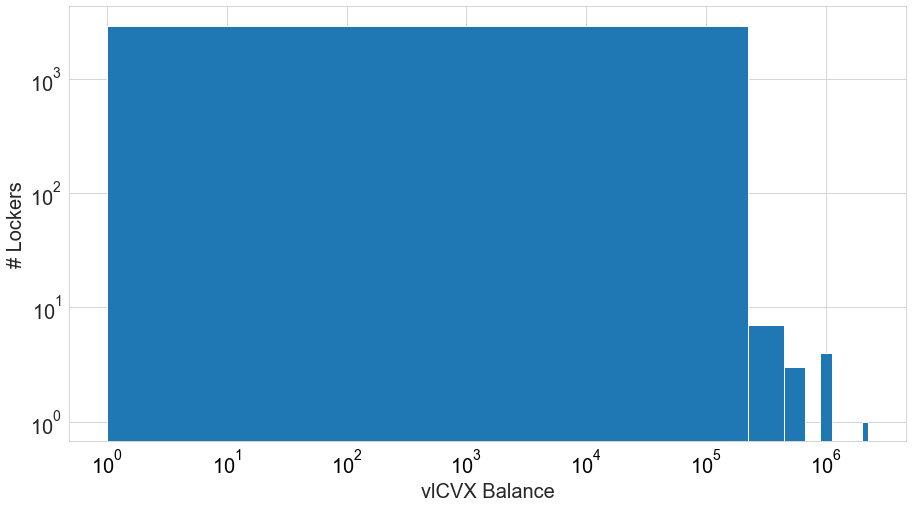

In [15]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))

ax.hist(export_df.vlcvx_balance, bins=10)

ax.set_ylabel("# Lockers", fontsize=20)
ax.set_xlabel("vlCVX Balance", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

ax.set_xscale("log")
ax.set_yscale("log")
